In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
df = pd.read_csv(r"F:\project\flat_file_final_12022018.csv")


In [18]:
df.head()

,Unnamed: 0,product_id,product_name,user_id,department_id,department,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered,product_popularity_cnt,department_popularity_cnt,IsOrganic
0,0,5876,Organic Lemon,28568,4,produce,55441,5,0,11,28.0,0,0.021388,0.929434,1
1,1,5876,Organic Lemon,28595,4,produce,172923,7,6,20,30.0,1,0.021388,0.929434,1
2,2,5876,Organic Lemon,28631,4,produce,225732,7,6,12,30.0,1,0.021388,0.929434,1
3,3,5876,Organic Lemon,28680,4,produce,3052709,23,4,14,16.0,1,0.021388,0.929434,1
4,4,5876,Organic Lemon,28745,4,produce,1130353,93,5,12,4.0,1,0.021388,0.929434,1


In [19]:
df.dtypes

Unnamed: 0                     int64
product_id                     int64
product_name                  object
user_id                        int64
department_id                  int64
department                    object
order_id                       int64
order_number                   int64
order_dow                      int64
order_hour_of_day              int64
days_since_prior_order       float64
reordered                      int64
product_popularity_cnt       float64
department_popularity_cnt    float64
IsOrganic                      int64
dtype: object

In [20]:
df.shape

(4266433, 15)

In [21]:
df.describe()

,Unnamed: 0,product_id,user_id,department_id,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered,product_popularity_cnt,department_popularity_cnt,IsOrganic
count,4.266433e+06,4.266433e+06,4.266433e+06,4.266433e+06,4.266433e+06,4.266433e+06,4.266433e+06,4.266433e+06,4.025124e+06,4.266433e+06,4.266433e+06,4.266433e+06,4.266433e+06
mean,2.133216e+06,2.833460e+04,1.029210e+05,4.679622e+00,1.710412e+06,1.840892e+01,2.665776e+00,1.341232e+01,1.094071e+01,7.508846e-01,4.867858e-02,8.668962e-01,6.779143e-01
std,1.231613e+06,1.317267e+04,5.951753e+04,2.681806e+00,9.873701e+05,1.828686e+01,2.112515e+00,4.260521e+00,8.692847e+00,4.325008e-01,3.232704e-02,2.269977e-01,4.672757e-01
min,0.000000e+00,4.605000e+03,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.773261e-02,1.857406e-02,0.000000e+00
25%,1.066608e+06,2.113700e+04,5.115300e+04,4.000000e+00,8.550860e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.000000e+00,2.138812e-02,9.294343e-01,0.000000e+00
50%,2.133216e+06,2.485200e+04,1.026110e+05,4.000000e+00,1.710271e+06,1.200000e+01,2.000000e+00,1.300000e+01,7.000000e+00,1.000000e+00,3.437532e-02,9.294343e-01,1.000000e+00
75%,3.199824e+06,4.226500e+04,1.544660e+05,4.000000e+00,2.565274e+06,2.600000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.000000e+00,6.459190e-02,9.294343e-01,1.000000e+00
max,4.266432e+06,4.968300e+04,2.062090e+05,1.600000e+01,3.421083e+06,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.000000e+00,1.151526e-01,9.294343e-01,1.000000e+00


In [22]:
df['order_dow'].value_counts().sort_values(ascending = False)

0    889255
1    764588
6    591259
2    537519
5    530619
3    479693
4    473500
Name: order_dow, dtype: int64

In [23]:
df_dow_count = df['order_dow'].value_counts().sort_values(ascending = False)

In [24]:
df_dow_count

0    889255
1    764588
6    591259
2    537519
5    530619
3    479693
4    473500
Name: order_dow, dtype: int64

we can see, that the big amount of the orders had been done at the begining of the week

In [25]:
df_hod_count=df['order_hour_of_day'].value_counts().sort_values(ascending = False)

In [26]:
df_hod_count

10    360312
14    354428
11    352453
15    351936
13    347967
12    339703
16    333100
9     327005
17    269646
8     238049
18    210992
19    162171
20    128966
7     126311
21    108898
22     87076
23     53272
6      39907
0      28359
1      14079
5      11514
2       8090
4       6356
3       5843
Name: order_hour_of_day, dtype: int64

we figure out, that big part of the customers are make orders in the first ant the second quarter of the day

# Adding new column - union of hours at which orders were made, divide the day to quarters:

In [27]:
HGroups_hours = {'00-06':list(range(0,6)),'06-12':list(range(6,12)),'12-18':list(range(12,18)),'18-24':list(range(18,24)) }
#Weekdays = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}v

In [28]:

def hourgroup(a):
    for key, values in HGroups_hours.items():
        if a in values:
            return key

In [29]:
df['order_HourGroup'] = df.order_hour_of_day.apply(hourgroup)

In [30]:
df.order_HourGroup.value_counts()

12-18    1996780
06-12    1444037
18-24     751375
00-06      74241
Name: order_HourGroup, dtype: int64

In [31]:
df.reset_index().set_index(['user_id','order_id']).sort_index()

index  Unnamed: 0  product_id            product_name  \
user_id order_id                                                            
1       431534     154544      154544       13176  Bag of Organic Bananas   
        1187899   3965375     3965375       27845      Organic Whole Milk   
        1187899   4108184     4108184       49235     Organic Half & Half   
        2295261   4161971     4161971       49235     Organic Half & Half   
        2398795    372698      372698       13176  Bag of Organic Bananas   
        3108588   4180142     4180142       49235     Organic Half & Half   
2       738281     972473      972473       24852                  Banana   
        738281    2371555     2371555       37646     Organic Gala Apples   
        738281    3196066     3196066       47209    Organic Hass Avocado   
        788338     979468      979468       24852                  Banana   
        788338    3199169     3199169       47209    Organic Hass Avocado   
        839880     986579      986579       24852                  Banana   
        839880    3202349     3202349       47209    Organic Hass Avocado   
        1199898    539527      539527       27966     Organic Raspberries   
        1199898   1036429     1036429       24852                  Banana   
        1199898   2301268     2301268       45066        Honeycrisp Apple   
        1199898   3224844     3224844       47209    Organic Hass Avocado   
        1402090   3237544     3237544       47209    Organic Hass Avocado   
        1447487   1070756     1070756       24852                  Banana   
        1447487   3240397     3240397       47209    Organic Hass Avocado   
        1492625    851548      851548       24852                  Banana   
        1492625   2269716     2269716       45066        Honeycrisp Apple   
        1501582   2189295     2189295       16797            Strawberries   
        1501582   2590208     2590208       47766         Organic Avocado   
        1673511   2599235     2599235       47766         Organic Avocado   
        1718559   1108129     1108129       24852                  Banana   
        1901567   2610946     2610946       47766         Organic Avocado   
        2168274    347098      347098       13176  Bag of Organic Bananas   
        2168274    578273      578273       27966     Organic Raspberries   
        2168274   2323918     2323918       45066        Honeycrisp Apple   
...                   ...         ...         ...                     ...   
206208  3049681   2791986     2791986       24964          Organic Garlic   
        3049681   3340689     3340689       47209    Organic Hass Avocado   
        3059777   1487604     1487604       47626             Large Lemon   
        3059777   1836297     1836297       21137    Organic Strawberries   
        3097121    450430      450430       13176  Bag of Organic Bananas   
        3097121    615624      615624       27966     Organic Raspberries   
        3128968    453909      453909       13176  Bag of Organic Bananas   
        3128968    616872      616872       27966     Organic Raspberries   
        3292671    471867      471867       13176  Bag of Organic Bananas   
        3292671   1854307     1854307       21137    Organic Strawberries   
        3292671   4103019     4103019       27845      Organic Whole Milk   
        3356245    478982      478982       13176  Bag of Organic Bananas   
        3356245    626153      626153       27966     Organic Raspberries   
        3356245   2118273     2118273       45007        Organic Zucchini   
        3356245   2801687     2801687       24964          Organic Garlic   
        3356245   4105518     4105518       27845      Organic Whole Milk   
        3392839    483054      483054       13176  Bag of Organic Bananas   
        3412250    628447      628447       27966     Organic Raspberries   
206209  272231     870251      870251       24852                  Banana   
        626363  

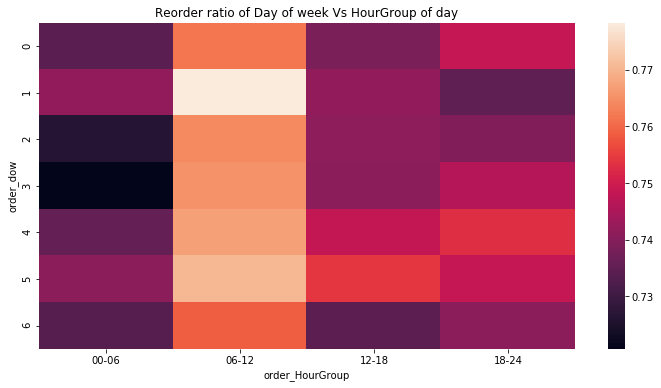

In [32]:
grouped_df = df.groupby(["order_dow", "order_HourGroup"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_HourGroup', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs HourGroup of day")
plt.show()

In [33]:
df_count_order_per_user=df[['user_id','order_id']].groupby(by=['user_id']).count()

In [34]:
df_count_order_per_user.head()

,order_id
user_id,
1,6
2,30
3,23
4,2
5,6


In [35]:
#df_count_product_per_order=
df.reset_index().set_index(['user_id','order_id','product_id']).sort_index()
#df[['user_id','order_id','product_id']].groupby(by=['user_id']).count()

index  Unnamed: 0            product_name  \
user_id order_id product_id                                                
1       431534   13176        154544      154544  Bag of Organic Bananas   
        1187899  27845       3965375     3965375      Organic Whole Milk   
                 49235       4108184     4108184     Organic Half & Half   
        2295261  49235       4161971     4161971     Organic Half & Half   
        2398795  13176        372698      372698  Bag of Organic Bananas   
        3108588  49235       4180142     4180142     Organic Half & Half   
2       738281   24852        972473      972473                  Banana   
                 37646       2371555     2371555     Organic Gala Apples   
                 47209       3196066     3196066    Organic Hass Avocado   
        788338   24852        979468      979468                  Banana   
                 47209       3199169     3199169    Organic Hass Avocado   
        839880   24852        986579      986579                  Banana   
                 47209       3202349     3202349    Organic Hass Avocado   
        1199898  24852       1036429     1036429                  Banana   
                 27966        539527      539527     Organic Raspberries   
                 45066       2301268     2301268        Honeycrisp Apple   
                 47209       3224844     3224844    Organic Hass Avocado   
        1402090  47209       3237544     3237544    Organic Hass Avocado   
        1447487  24852       1070756     1070756                  Banana   
                 47209       3240397     3240397    Organic Hass Avocado   
        1492625  24852        851548      851548                  Banana   
                 45066       2269716     2269716        Honeycrisp Apple   
        1501582  16797       2189295     2189295            Strawberries   
                 47766       2590208     2590208         Organic Avocado   
        1673511  47766       2599235     2599235         Organic Avocado   
        1718559  24852       1108129     1108129                  Banana   
        1901567  47766       2610946     2610946         Organic Avocado   
        2168274  13176        347098      347098  Bag of Organic Bananas   
                 27966        578273      578273     Organic Raspberries   
                 45066       2323918     2323918        Honeycrisp Apple   
...                              ...         ...                     ...   
206208  3049681  24964       2791986     2791986          Organic Garlic   
                 47209       3340689     3340689    Organic Hass Avocado   
        3059777  21137       1836297     1836297    Organic Strawberries   
                 47626       1487604     1487604             Large Lemon   
        3097121  13176        450430      450430  Bag of Organic Bananas   
                 27966        615624      615624     Organic Raspberries   
        3128968  13176        453909      453909  Bag of Organic Bananas   
                 27966        616872      616872     Organic Raspberries   
        3292671  13176        471867      471867  Bag of Organic Bananas   
                 21137       1854307     1854307    Organic Strawberries   
                 27845       4103019     4103019      Organic Whole Milk   
        3356245  13176        478982      478982  Bag of Organic Bananas   
                 24964       2801687     2801687          Organic Garlic   
                 27845       4105518     4105518      Organic Whole Milk   
                 27966        626153      626153     Organic Raspberries   
                 45007       2118273     2118273        Organic Zucchini   
        3392839  13176        483054      483054  Bag of Organic Bananas   
        3412250  27966        628447      628447     Organic Raspberries   
206209  272231   24852        870251      870251                  Banana   
        626363   24852        956874      956874                  Banana   
   

In [36]:
filt = df.user_id == 1
df[['order_id','product_id']][filt
                              ].groupby(by=['order_id']).count()

,product_id
order_id,
431534,1
1187899,2
2295261,1
2398795,1
3108588,1


# Counting the amount of the products per orders:

In [39]:
df_count_product_per_order=df[['order_id','product_id']].groupby(by=['order_id']).count()#.plot()

In [40]:
df_count_product_per_order.describe()

,product_id
count,1.966451e+06
mean,2.169611e+00
std,1.428013e+00
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,3.000000e+00
max,1.600000e+01


the maximun products that customer by is 16, and the minimum is 1 per order.

In [41]:
df_count_product_per_order.head()

,product_id
order_id,
1,3
3,1
5,3
10,5
14,2


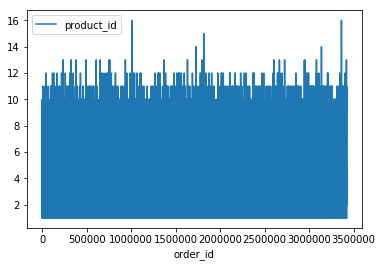

In [31]:
#df_count_product_per_order=df[['order_id','product_id']].groupby(by=['order_id']).count().plot()

In [42]:
df_count_product_per_order.loc[df_count_product_per_order['product_id'] == 16]

,product_id
order_id,
1007609,16
3363891,16


In [43]:
type(df_count_product_per_order)

pandas.core.frame.DataFrame

# Adding new column of "grades" on amount's product per order

In [44]:
df_count_product_per_order.columns

Index(['product_id'], dtype='object')

In [45]:
df_count_product_per_order2 = df_count_product_per_order.copy()

In [46]:
df_count_product_per_order2 =  df_count_product_per_order2['product_id']

In [47]:
df_count_product_per_order2 = (df_count_product_per_order2/(16))

In [48]:
df_count_product_per_order2.head()

order_id
1     0.1875
3     0.0625
5     0.1875
10    0.3125
14    0.1250
Name: product_id, dtype: float64

In [49]:
df_count_product_per_order2.describe()

count    1.966451e+06
mean     1.356007e-01
std      8.925084e-02
min      6.250000e-02
25%      6.250000e-02
50%      1.250000e-01
75%      1.875000e-01
max      1.000000e+00
Name: product_id, dtype: float64

In [50]:
type(df_count_product_per_order2)

pandas.core.series.Series

In [51]:
df_count_product_per_order2.to_frame(name='Percentage_amount_product')

,Percentage_amount_product
order_id,
1,0.1875
3,0.0625
5,0.1875
10,0.3125
14,0.1250
18,0.1875
19,0.0625
20,0.0625
22,0.0625


In [52]:
 df2 = df_count_product_per_order2.to_frame(name='Percentage_amount_product')

In [53]:
df_percentage_t = pd.merge(df,df2, left_on='order_id',right_on='order_id')

In [47]:
df_percentage_t

,Unnamed: 0,product_id,product_name,user_id,department_id,department,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,reordered,product_popularity_cnt,department_popularity_cnt,IsOrganic,order_HourGroup,Percentage_amount_product
0,0,5876,Organic Lemon,28568,4,produce,55441,5,0,11,28.0,0,0.021388,0.929434,1,06-12,0.3125
1,91251,13176,Bag of Organic Bananas,28568,4,produce,55441,5,0,11,28.0,1,0.092567,0.929434,1,06-12,0.3125
2,486181,27966,Organic Raspberries,28568,4,produce,55441,5,0,11,28.0,1,0.033424,0.929434,1,06-12,0.3125
3,628784,39275,Organic Blueberries,28568,4,produce,55441,5,0,11,28.0,0,0.024617,0.929434,1,06-12,0.3125
4,733810,22935,Organic Yellow Onion,28568,4,produce,55441,5,0,11,28.0,1,0.027591,0.929434,1,06-12,0.3125
5,1,5876,Organic Lemon,28595,4,produce,172923,7,6,20,30.0,1,0.021388,0.929434,1,18-24,0.1875
6,628786,39275,Organic Blueberries,28595,4,produce,172923,7,6,20,30.0,0,0.024617,0.929434,1,18-24,0.1875
7,2010851,45007,Organic Zucchini,28595,4,produce,172923,7,6,20,30.0,0,0.025645,0.929434,1,18-24,0.1875
8,2,5876,Organic Lemon,28631,4,produce,225732,7,6,12,30.0,1,0.021388,0.929434,1,12-18,0.2500
9,2428683,4605,Yellow Onions,28631,4,produce,225732,7,6,12,30.0,1,0.018031,0.929434,0,12-18,0.2500


In [54]:
df_percentage_t=df_percentage_t.drop(columns=['order_hour_of_day'])

In [55]:
df_percentage_t.head()

,Unnamed: 0,product_id,product_name,user_id,department_id,department,order_id,order_number,order_dow,days_since_prior_order,reordered,product_popularity_cnt,department_popularity_cnt,IsOrganic,order_HourGroup,Percentage_amount_product
0,0,5876,Organic Lemon,28568,4,produce,55441,5,0,28.0,0,0.021388,0.929434,1,06-12,0.3125
1,91251,13176,Bag of Organic Bananas,28568,4,produce,55441,5,0,28.0,1,0.092567,0.929434,1,06-12,0.3125
2,486181,27966,Organic Raspberries,28568,4,produce,55441,5,0,28.0,1,0.033424,0.929434,1,06-12,0.3125
3,628784,39275,Organic Blueberries,28568,4,produce,55441,5,0,28.0,0,0.024617,0.929434,1,06-12,0.3125
4,733810,22935,Organic Yellow Onion,28568,4,produce,55441,5,0,28.0,1,0.027591,0.929434,1,06-12,0.3125


In [50]:
df_percentage_t.reset_index().set_index(['user_id','order_id','product_id']).sort_index()

index  Unnamed: 0            product_name  \
user_id order_id product_id                                                
1       431534   13176        465930      154544  Bag of Organic Bananas   
        1187899  27845       4180729     3965375      Organic Whole Milk   
                 49235       4180730     4108184     Organic Half & Half   
        2295261  49235       4234078     4161971     Organic Half & Half   
        2398795  13176        995477      372698  Bag of Organic Bananas   
        3108588  49235       4239979     4180142     Organic Half & Half   
2       738281   24852       2182393      972473                  Banana   
                 37646       2182394     2371555     Organic Gala Apples   
                 47209       2182395     3196066    Organic Hass Avocado   
        788338   24852       2196193      979468                  Banana   
                 47209       2196194     3199169    Organic Hass Avocado   
        839880   24852       2210152      986579                  Banana   
                 47209       2210153     3202349    Organic Hass Avocado   
        1199898  24852       1372420     1036429                  Banana   
                 27966       1372419      539527     Organic Raspberries   
                 45066       1372421     2301268        Honeycrisp Apple   
                 47209       1372422     3224844    Organic Hass Avocado   
        1402090  47209       4012393     3237544    Organic Hass Avocado   
        1447487  24852       2376110     1070756                  Banana   
                 47209       2376111     3240397    Organic Hass Avocado   
        1492625  24852       1942988      851548                  Banana   
                 45066       1942989     2269716        Honeycrisp Apple   
        1501582  16797       3593872     2189295            Strawberries   
                 47766       3593873     2590208         Organic Avocado   
        1673511  47766       3800485     2599235         Organic Avocado   
        1718559  24852       2450386     1108129                  Banana   
        1901567  47766       3805427     2610946         Organic Avocado   
        2168274  13176        933374      347098  Bag of Organic Bananas   
                 27966        933375      578273     Organic Raspberries   
                 45066        933376     2323918        Honeycrisp Apple   
...                              ...         ...                     ...   
206208  3049681  24964        277752     2791986          Organic Garlic   
                 47209        277753     3340689    Organic Hass Avocado   
        3059777  21137       3095355     1836297    Organic Strawberries   
                 47626       3095354     1487604             Large Lemon   
        3097121  13176       1184226      450430  Bag of Organic Bananas   
                 27966       1184227      615624     Organic Raspberries   
        3128968  13176       1192705      453909  Bag of Organic Bananas   
                 27966       1192706      616872     Organic Raspberries   
        3292671  13176       1236020      471867  Bag of Organic Bananas   
                 21137       1236021     1854307    Organic Strawberries   
                 27845       1236022     4103019      Organic Whole Milk   
        3356245  13176       1253069      478982  Bag of Organic Bananas   
                 24964       1253072     2801687          Organic Garlic   
                 27845       1253073     4105518      Organic Whole Milk   
                 27966       1253070      626153     Organic Raspberries   
                 45007       1253071     2118273        Organic Zucchini   
        3392839  13176       1263061      483054  Bag of Organic Bananas   
        3412250  27966       1540664      628447     Organic Raspberries   
206209  272231   24852       1980064      870251                  Banana   
        626363   24852       2151179      956874                  Banana   
   

In [60]:
df_percentage_t['order_HourGroup'] =df_percentage_t['order_HourGroup'].astype('category')

In [61]:
df_percentage_t.to_csv("flat_file_df_percentage_t.csv")

In [57]:
df1=df_percentage_t.sample(n=2133217)

# Exploratory Data Analysis (EDA)

Showing graphs which will help us unsderstand the type of distributions of numeric data and for categorical data. 


F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
F:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
F:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


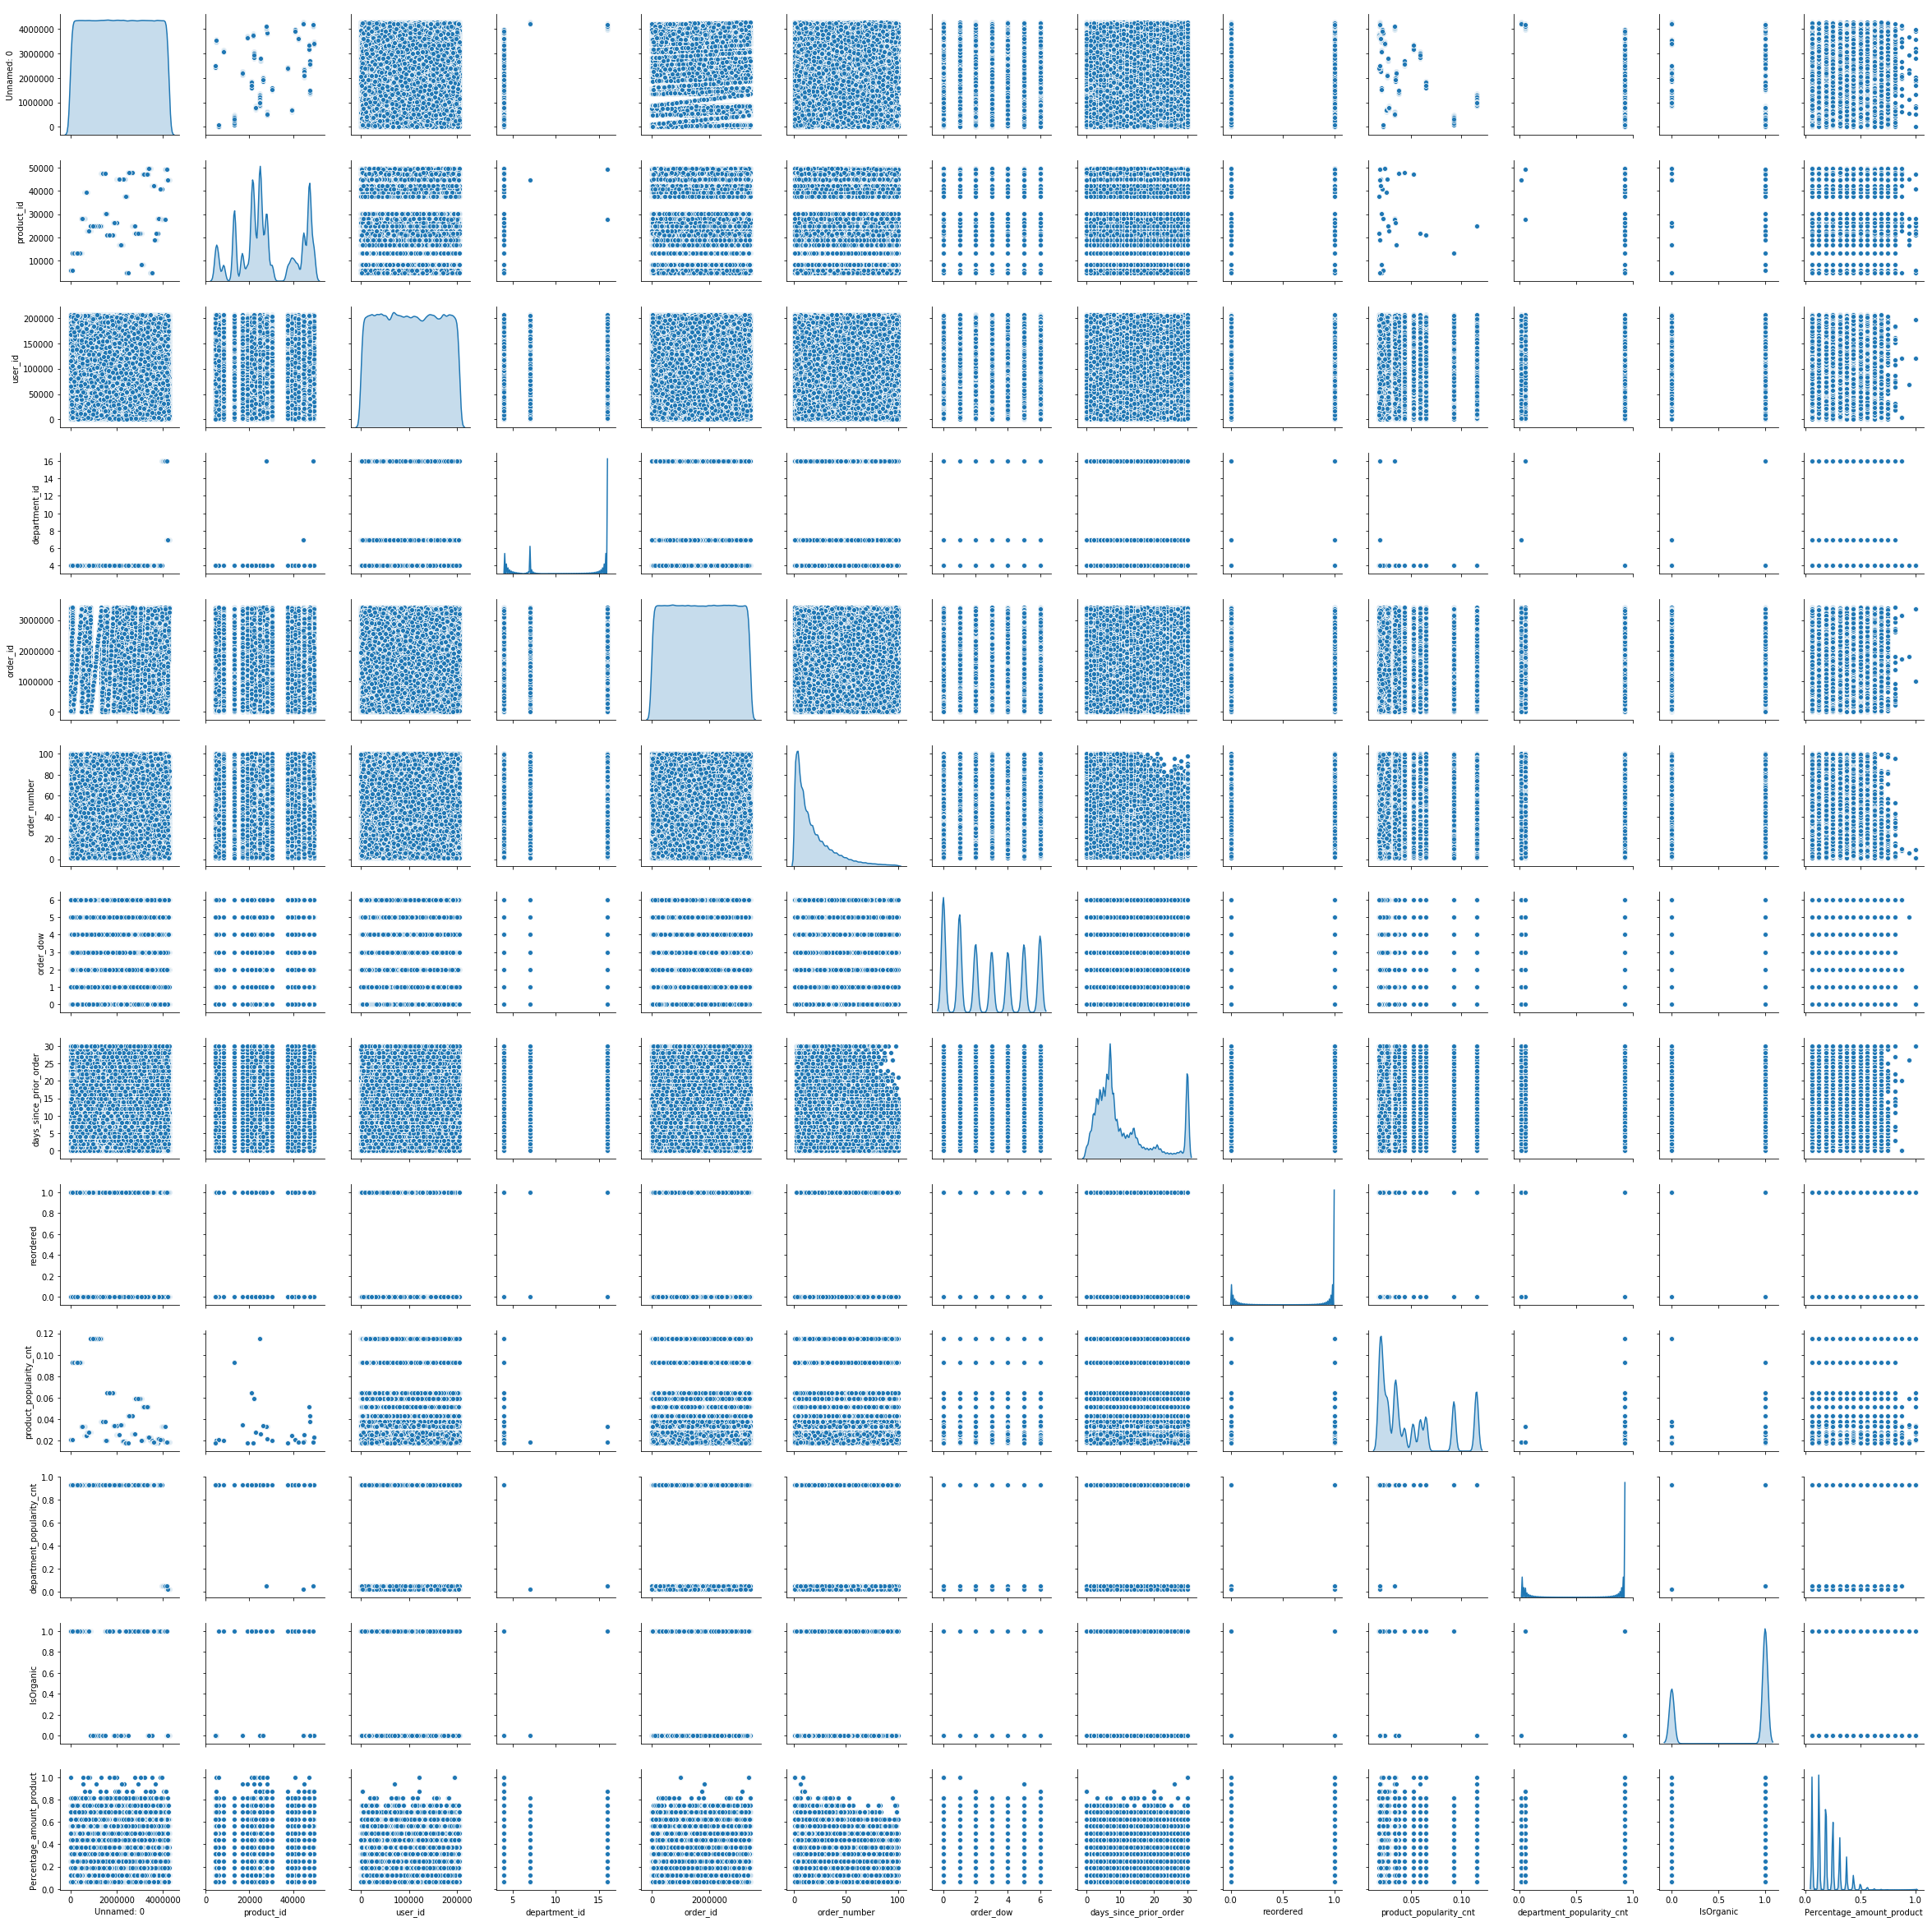

In [54]:
sns.pairplot(df1,dropna='true',diag_kind='kde')

In [5]:
df2 = pd.read_csv(r"F:\project\flat_file_df_percentage_t.csv")


In [6]:
df2.dtypes

Unnamed: 0                     int64
Unnamed: 0.1                   int64
product_id                     int64
product_name                  object
user_id                        int64
department_id                  int64
department                    object
order_id                       int64
order_number                   int64
order_dow                      int64
days_since_prior_order       float64
reordered                      int64
product_popularity_cnt       float64
department_popularity_cnt    float64
IsOrganic                      int64
order_HourGroup               object
Percentage_amount_product    float64
dtype: object

In [7]:
df2['order_HourGroup'] =df2['order_HourGroup'].astype('category')

In [8]:
df3=df2.sample(n=2133217)

F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


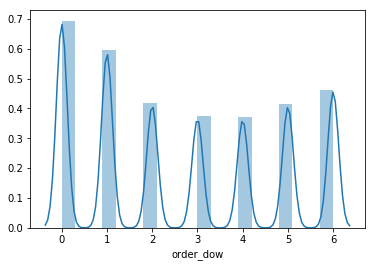

In [10]:
sns.distplot(df3.order_dow ,bins=20)

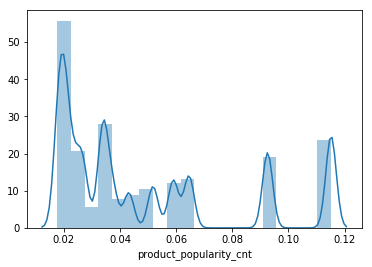

In [11]:
sns.distplot(df3.product_popularity_cnt,bins=20)

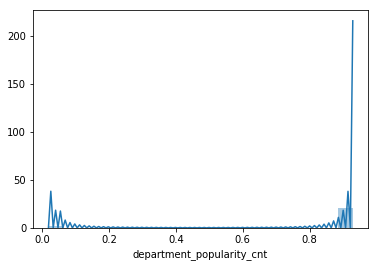

In [12]:
sns.distplot(df3.department_popularity_cnt,bins=20)

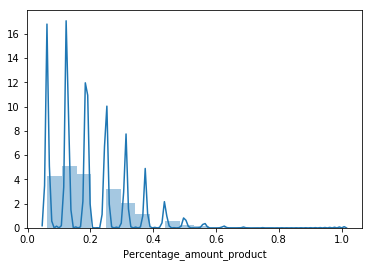

In [13]:
sns.distplot(df3.Percentage_amount_product,bins=20)

F:\Anaconda\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
F:\Anaconda\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
F:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
F:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


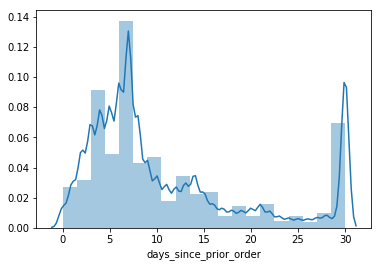

In [58]:

sns.distplot(df3.days_since_prior_order,bins=20)

In [ ]:
sns.distplot(df3.order_HourGroup,bins=20)

# reordered product

In [15]:

# percentage of re-orders in table
df2.reordered.sum() / df2.shape[0] # gives number of row count

0.750884638291519

# The next notebook - explatory_data_missing_value
Day since prior order - missing